In [98]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets.fashion_mnist as fm
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from   tensorflow.keras.optimizers import Adam
from   tensorflow.keras.losses import SparseCategoricalCrossentropy

In [99]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [100]:
(x_train , y_train),(x_test, y_test) = fm.load_data()

In [101]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [102]:
 # 0	T-shirt/top
 # 1	Trouser
 # 2	Pullover
 # 3	Dress
 # 4	Coat
 # 5	Sandal
 # 6	Shirt
 # 7	Sneaker
 # 8	Bag
 # 9	Ankle boot
label_map = {0:'T-shirt/top' , 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',
             
             7:'Sneaker', 8:'Bag', 9:'Ankle boot' }
print(label_map)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


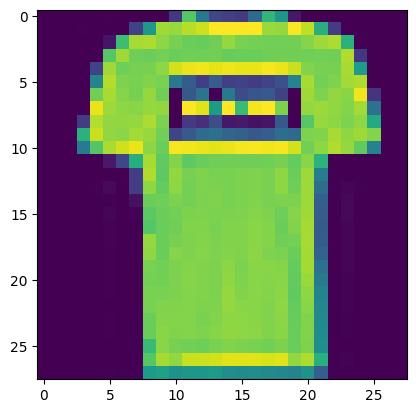

In [103]:
plt.imshow(x_train[1])

In [104]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [105]:
model = Sequential([
        Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        #Fully connected layers
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

In [106]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [107]:
model.compile(optimizer=Adam(),loss = SparseCategoricalCrossentropy(from_logits=True))

In [108]:
x_train = np.expand_dims(x_train,-1)

In [109]:
model.fit(x_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 178s 3ms/sample - loss: 1.7358
Epoch 2/5
60000/60000 [==============================] - 176s 3ms/sample - loss: 1.6510
Epoch 3/5
60000/60000 [==============================] - 174s 3ms/sample - loss: 1.5945
Epoch 4/5
60000/60000 [==============================] - 180s 3ms/sample - loss: 1.5815
Epoch 5/5
60000/60000 [==============================] - 178s 3ms/sample - loss: 1.5725


In [127]:
example = 100
predicted = np.argmax(model.predict(x_test[example].reshape(-1,28,28,1)))
#print(label_map[predicted])
print(predicted)
print(label_map[predicted])
print(y_test[example])

3
Dress
3


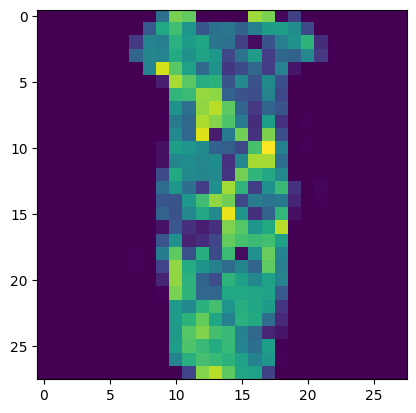

In [128]:
plt.imshow(x_test[example])